# Brief introduction to Python (for Matlab users)

Many libraries exist to support scientific computations in Python. Some of these libraries are very similar as language and phylosophy with Matlab. Among these:
- **Numpy**,
- **Matplotlib**, and
- **Scipy**

are the most popular to get started with.



## NUMPY


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


In [21]:
%matplotlib notebook

In [22]:
x = np.linspace(0,100)
y = np.linspace(0,100)

# This will generate arrays of one dimension of length 50 default value - NOT vectors.
# to create a vectors a new dimension is required

xm = x[:,np.newaxis]

# xm - will have size 50,1

ym = y[np.newaxis,:]

# ym - will have size 1,50

sig1 = np.sin(ym/5);
sig2 = np.exp(-xm/50)
zm = np.dot(sig2,sig1)

zm

array([[ 0.        ,  0.39692415,  0.72863478, ...,  0.32793565,
         0.67597047,  0.91294525],
       [ 0.        ,  0.38104934,  0.69949336, ...,  0.31482   ,
         0.64893532,  0.87643241],
       [ 0.        ,  0.36580944,  0.67151743, ...,  0.30222892,
         0.62298144,  0.84137988],
       ..., 
       [ 0.        ,  0.05828693,  0.10699748, ...,  0.04815621,
         0.09926391,  0.13406283],
       [ 0.        ,  0.05595577,  0.10271816, ...,  0.04623022,
         0.09529389,  0.12870105],
       [ 0.        ,  0.05371784,  0.09860999, ...,  0.04438126,
         0.09148265,  0.1235537 ]])

## MATPLOTLIB

Start with 1D plots.

<IPython.core.display.Javascript object>


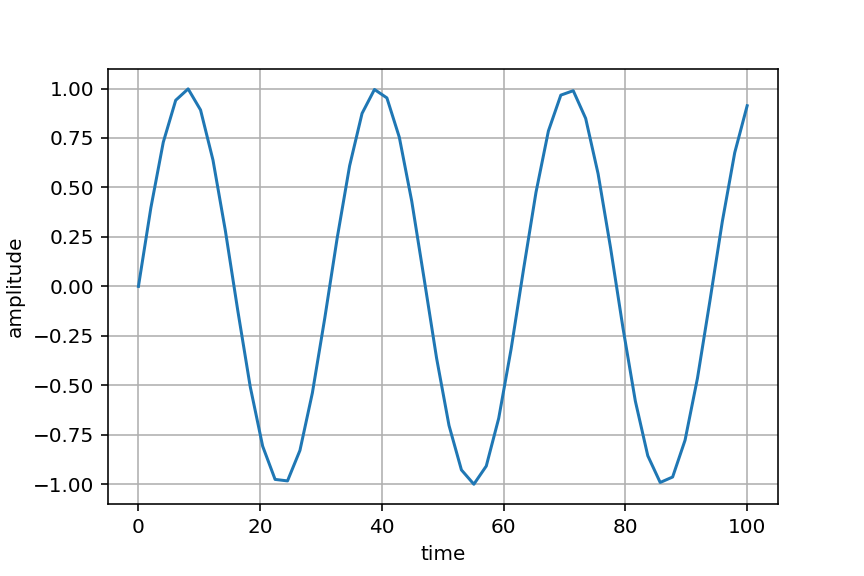

In [23]:
plt.figure()
plt.plot(x,np.squeeze(sig1))
plt.xlabel('time')
plt.ylabel('amplitude')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


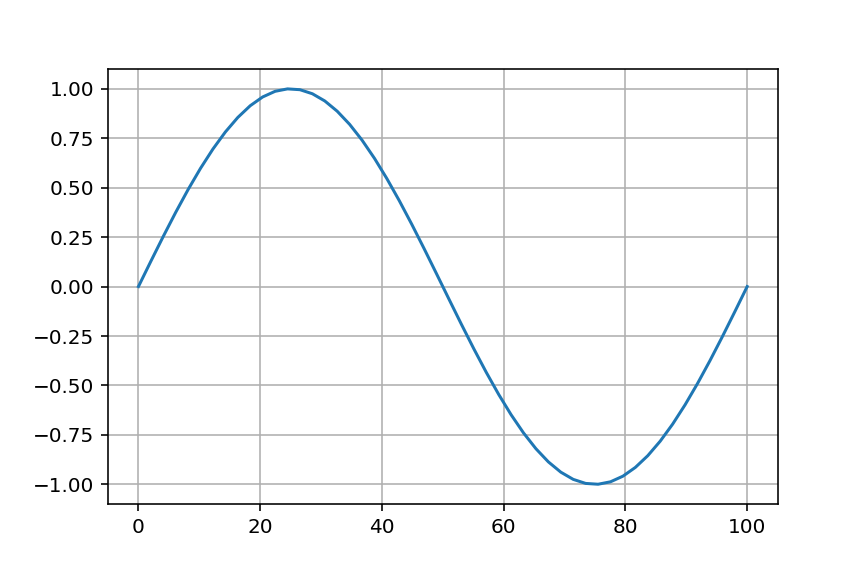

<function __main__.sig_plot>

In [24]:
from ipywidgets import interact

#@interact(f=(0.0,10.0))
def sig_plot(f=5.0):
    fig1 = plt.figure()
    sig = np.sin(2*np.pi*f*x/10.0)
    #ax = fig.add_subplot(1, 1, 1)
    plt.plot(x, sig)
    plt.grid()
    plt.show()
    
interact(sig_plot,f=(0.0,10.0))    
    
    

<IPython.core.display.Javascript object>


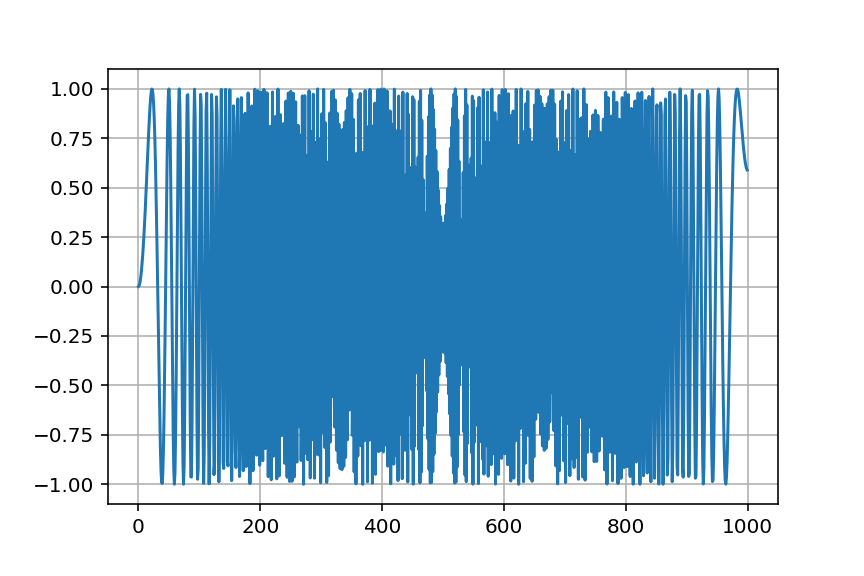

<function __main__.sig_plot>

In [25]:
#plt.xkcd()
x1 = np.arange(0,1000)

def sig_plot(f0,f=5.0):
    fig2 = plt.figure()
    sig = np.sin(2*np.pi*(f0*x1 + f*x1*x1)/10000.0)
    ax = fig2.add_subplot(1, 1, 1)
    ax.plot(x1, sig)
    plt.grid()
    plt.show()
interact(sig_plot, f0=[1,5,10],f=(0.0,10.0))

<IPython.core.display.Javascript object>


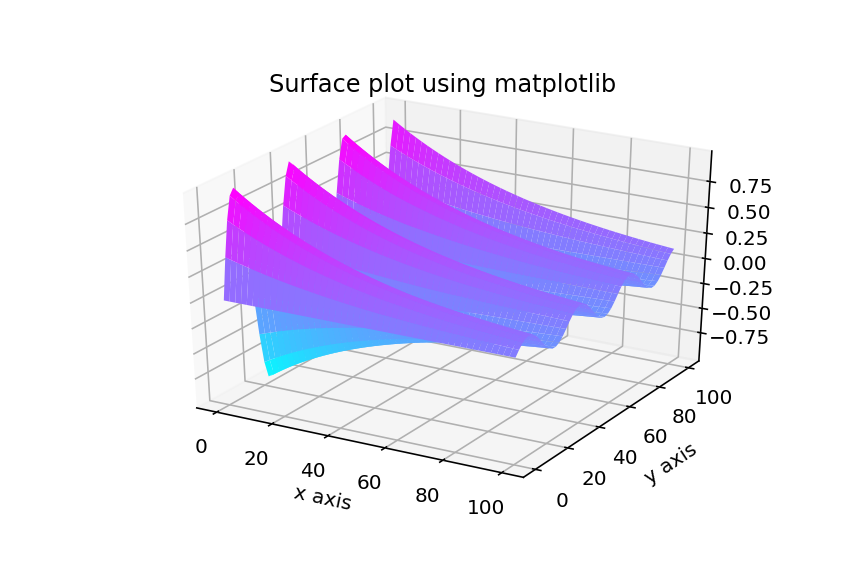

In [26]:

fig = plt.figure()

ax = fig.gca(projection='3d')

s = ax.plot_surface(xm,ym,zm,cmap='cool')

plt.xlabel('x axis')
plt.ylabel('y axis')

plt.title('Surface plot using matplotlib')


<IPython.core.display.Javascript object>


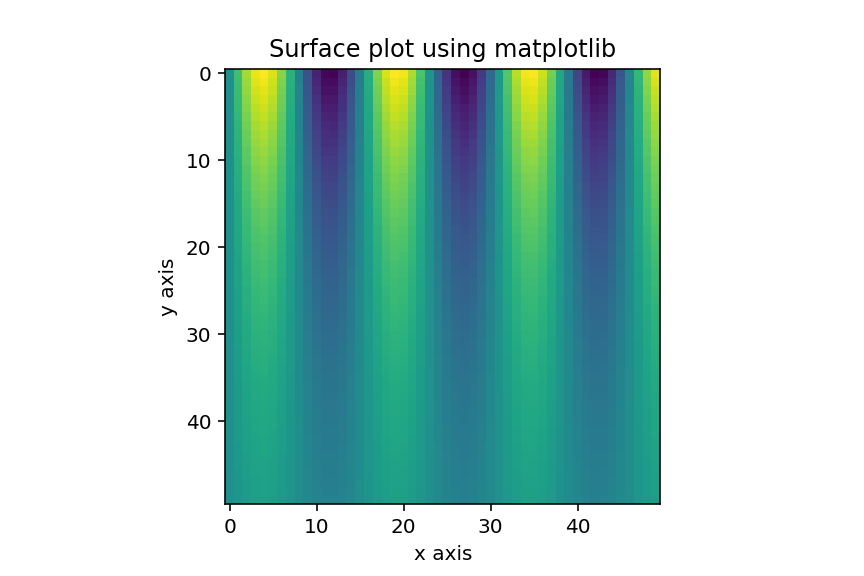

In [27]:
fig2 = plt.figure()
plt.imshow(zm)
plt.xlabel('x axis')
plt.ylabel('y axis')

plt.title('Surface plot using matplotlib')

## and BOKEH

In [28]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [29]:
fig1 = figure(x_range=(0, 100), y_range=(0, 100))
s = np.exp(1j*np.dot(xm,ym)/100)

# must give a vector of image data for image parameter
fig1.image(image=[np.absolute(zm)], x=0, y=0, dw=100, dh=100, palette="Spectral11")

#output_file("image.html", title="image.py example")

show(fig1)  # open a browser

## SCIPY (SIGNAL)

<IPython.core.display.Javascript object>


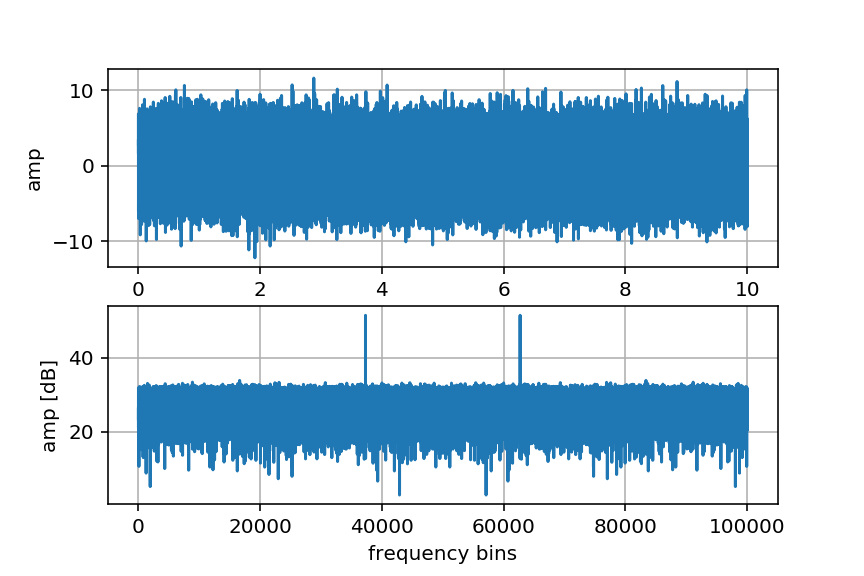

In [30]:
import scipy.signal as sg

fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1270.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

sx = np.fft.fft(x)
sx = np.fft.fftshift(sx)

# plot time domain
plt.figure()
plt.subplot(2,1,1)
plt.plot(time,x)
plt.grid()
plt.xlabel('time')
plt.ylabel('amp')


# plot frequency domain
plt.subplot(2,1,2)
plt.plot(10*np.log10(np.abs(sx)))
plt.grid()
plt.xlabel('frequency bins')
plt.ylabel('amp [dB]')

plt.show()


<IPython.core.display.Javascript object>


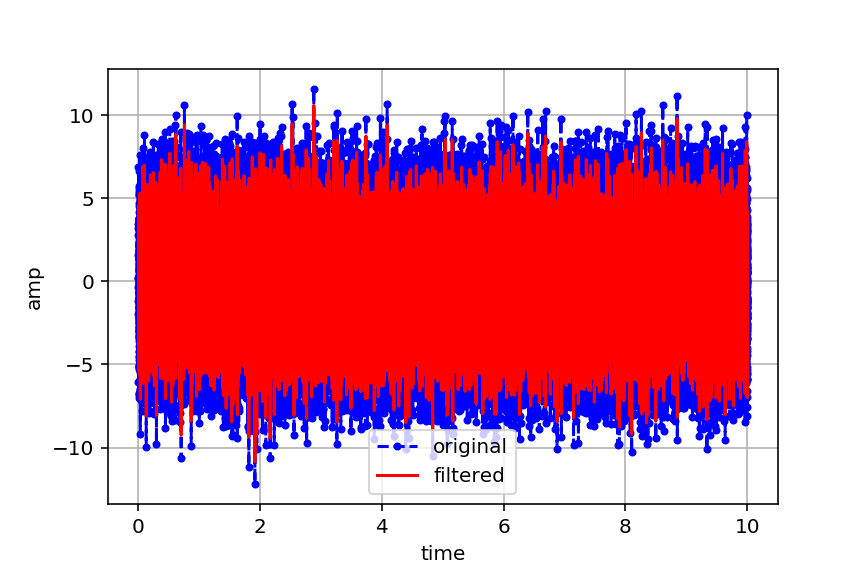

In [31]:
fx = sg.wiener(x)

# plot time domain
plt.figure()

plt.plot(time,x,'--b.')
plt.hold
plt.plot(time,fx,'r')
plt.grid()
plt.xlabel('time')
plt.ylabel('amp')
plt.legend(['original','filtered'])
